<a href="https://colab.research.google.com/github/shjiinn/Python_Review/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8_%EC%84%A4%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 환경 준비

In [2]:
# 텐서플로 라이브러리 안에 있는 케라스 API에서 필요한 함수들을 불러옵니다.
# 텐서플로 : 상세하게 다루고싶을 떄, Keras : 모델링
# 구글에서 만듦
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense   

# 데이터를 다루는 데 필요한 라이브러리를 불러옵니다.
import numpy as np


- C:\ProgramData\Anaconda3\Lib\site-packages\tensorflow\python\keras

### 2. 데이터 준비


In [7]:
# 준비된 수술 환자 데이터를 불러옵니다.

Data_set = np.loadtxt("/content/ThoraricSurgery3.csv", delimiter=",")  
X = Data_set[:,0:16]    # 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:,16]      # 수술 1년 후 사망/생존 여부를 y로 지정합니다.
Data_set

array([[ 1.  ,  2.88,  2.16, ...,  0.  , 60.  ,  0.  ],
       [ 2.  ,  3.4 ,  1.88, ...,  0.  , 51.  ,  0.  ],
       [ 2.  ,  2.76,  2.08, ...,  0.  , 59.  ,  0.  ],
       ...,
       [ 2.  ,  3.04,  2.08, ...,  0.  , 52.  ,  0.  ],
       [ 2.  ,  1.96,  1.68, ...,  0.  , 79.  ,  0.  ],
       [ 2.  ,  4.72,  3.56, ...,  0.  , 51.  ,  0.  ]])

### 3. 구조 결정

In [4]:
# 딥러닝 모델의 구조를 결정합니다.
# Dense라는 클래스에 add - Keras : 블록 쌓기, Tesorflow : 블록 안을 세세하게 설정하는 것

model = Sequential()
#입력층, 은닉층 if add(Dense())가 더 있다면 하위 add가 은닉층
model.add(Dense(30, input_dim=16, activation='relu'))
#출력층
model.add(Dense(1, activation='sigmoid'))

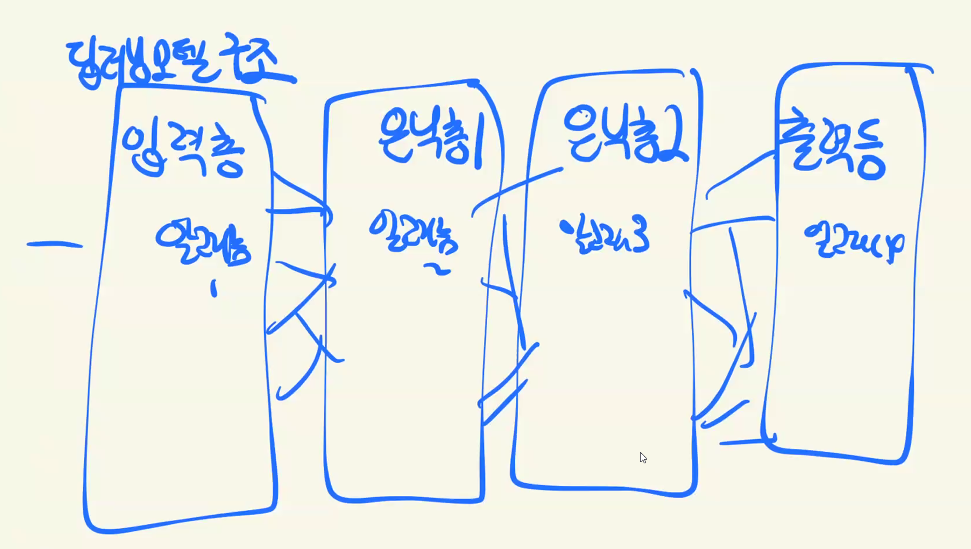

 - 입력층 : label, feature
  -  input_dim은 feature 수
  - 30 은 Node 수 wx+b가 30개 있다.
 - 출력층 : Node 수 1개
 - activation 활동함수 16개의 데이터를 가져와서 30개가 입력층에서 출력됨-> 은닉층 1에서 어떻게 출력할 건지
 출력층은 sigmoid 함수 많이 씀.
  - sigmoid : 0 or 1 출력됨

### 4. 모델 실행

- loss : 오차함수_오차를 줄이는데 사용할 알고리즘, 2진분류는 binary_crossentropy를 주로 씀 

  - 참고)mean_squared_error(평균제곱오차함수)

- optimizer : 오차역전파..출력층에서 입력층으로 올라가면서 가중치를 변경하면서 최적화하는 알고리즘

- metrics : 정확도를 쓸 것이다.

- fit-epochs : 30 반복실행 횟수-학습시킬 때마다 정확도는 상승, 로스는 감소/적당히 돌리는게 중요->텐서플로우에서 기존의 정확도와 비교하여 더 좋은게 없으면 알아서 중단함

- fit_batch_size : 데이터를 한번에 들고올때 얼마만큼의 크기로 가져올 것이냐..Train 데이터를 얼마만큼의 크기로 한번에 가져올 것인지 469개의 Data에서 몇 개를 한 번에 읽어들일 것인가.

In [5]:
# 딥러닝 모델을 실행합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history=model.fit(X, y, epochs=30, batch_size=16)

Epoch 1/30
30/30 [==============================] - 1s 2ms/step - loss: 0.9588 - accuracy: 0.8511
Epoch 2/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.8404
Epoch 3/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.8489
Epoch 4/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8511
Epoch 5/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8511
Epoch 6/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8532
Epoch 7/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8489
Epoch 8/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8511
Epoch 9/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8511
Epoch 10/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8511
Epoch 11/30
30/30 [

In [6]:
#print("\n Accuracy: %.4f" % (model.evaluate(X, y)[0])) : loss
#[1]은 accuracy
print("\n Accuracy: %.4f" % (model.evaluate(X, y)[1]))

15/15 [==============================] - 0s 3ms/step - loss: 0.4129 - accuracy: 0.8511

 Accuracy: 0.8511


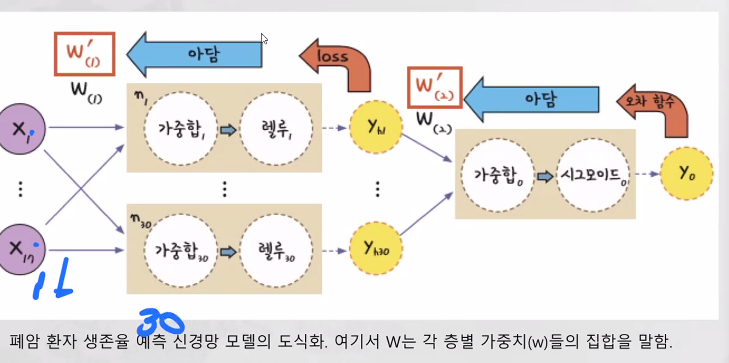